<a href="https://colab.research.google.com/github/dblakney0895/customer-churn-analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction & Retention Risk Analysis

## Executive Summary

This project analyzes customer churn behavior using the IBM Telco dataset. The objective is to identify key drivers of churn and build a predictive model that can classify high-risk customers.

Using exploratory data analysis and logistic regression modeling, we identify behavioral and contract-based factors that significantly influence churn probability.

This analysis provides actionable retention strategies that organizations can use to reduce customer attrition and improve lifetime value.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")


In [ ]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.isnull().sum()


,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df.columns


Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [ ]:
df["Churn Value"].value_counts()


,count
Churn Value,
0,5174
1,1869


In [ ]:
df["Churn Value"].value_counts(normalize=True)


,proportion
Churn Value,
0,0.73463
1,0.26537


In [ ]:
# Separate features and target
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8005677785663591

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1009
           1       0.68      0.57      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409


Confusion Matrix:
 [[900 109]
 [172 228]]


In [ ]:
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7679205110007097

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1009
           1       0.57      0.78      0.66       400

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.80      0.77      0.78      1409


Confusion Matrix:
 [[771 238]
 [ 89 311]]


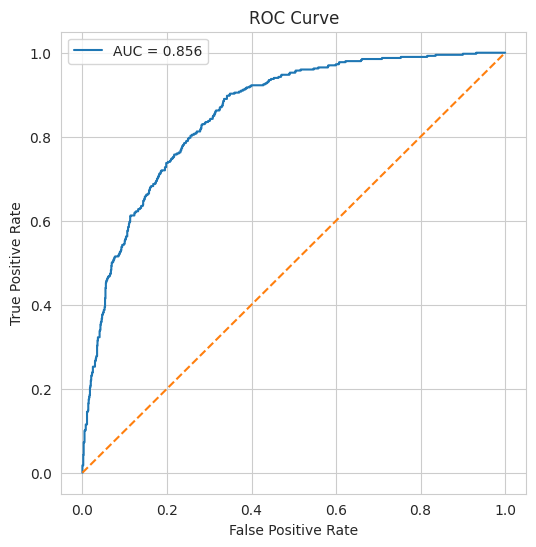

AUC Score: 0.8556305748265609


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", auc)


In [ ]:
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

coefficients.head(10)


,Feature,Coefficient
5301,Total Charges_4759.75,1.670679
4414,Total Charges_3046.4,1.646337
2983,Total Charges_1327.15,1.593862
6041,Total Charges_6440.25,1.581293
4058,Total Charges_2460.15,1.563116
2521,Total Charges_1021.8,1.546993
5326,Total Charges_4820.15,1.539302
4472,Total Charges_3147.5,1.510995
5574,Total Charges_5356.45,1.484827
2992,Total Charges_1334,1.483811


In [ ]:
coefficients.tail(10)


,Feature,Coefficient
23,Contract_One year,-0.650344
2818,Total Charges_1218.25,-0.665285
6558,Total Charges_,-0.668882
928,Total Charges_220.45,-0.730974
170,Total Charges_44.75,-0.744102
599,Total Charges_118.25,-0.819297
157,Total Charges_44,-0.888729
78,Total Charges_24.4,-0.953983
24,Contract_Two year,-1.338085
5,Dependents_Yes,-1.482881


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# target
y = df["Churn Value"]

# features
X = df.drop("Churn Value", axis=1).copy()

# Ensure numeric columns are numeric (just in case Excel imported as object)
for col in ["Monthly Charges", "Total Charges", "Tenure Months"]:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Column types
numeric_features = ["Tenure Months", "Monthly Charges", "Total Charges"]
categorical_features = [c for c in X.columns if c not in numeric_features]

# Preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features),
    ]
)

# Model (balanced)
clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
    ]
)

# Fit
clf.fit(X_train, y_train)

# Predict / Evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# target
y = df["Churn Value"]

# features
X = df.drop("Churn Value", axis=1).copy()

# Force numeric columns numeric (Excel sometimes imports as object)
numeric_features = ["Tenure Months", "Monthly Charges", "Total Charges"]
for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors="coerce")

categorical_features = [c for c in X.columns if c not in numeric_features]

# Split (stratify keeps churn % consistent)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Model
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

# Fit
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7444996451383961
AUC: 0.8488103541811982

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


Confusion Matrix:
 [[758 277]
 [ 83 291]]


In [ ]:
# Pull feature names from the fitted preprocessing step
ohe = clf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_features)

feature_names = np.concatenate([numeric_features, cat_names])
coefs = clf.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
coef_df["Abs"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Abs", ascending=False).drop(columns="Abs")

print("Top drivers increasing churn risk (positive coefficients):")
display(coef_df.sort_values("Coefficient", ascending=False).head(12))

print("Top drivers decreasing churn risk (negative coefficients):")
display(coef_df.sort_values("Coefficient", ascending=True).head(12))


Top drivers increasing churn risk (positive coefficients):


,Feature,Coefficient
10,Internet Service_Fiber optic,1.034546
2,Total Charges,0.503591
28,Payment Method_Electronic check,0.400119
23,Streaming Movies_Yes,0.365849
21,Streaming TV_Yes,0.344566
9,Multiple Lines_Yes,0.322738
26,Paperless Billing_Yes,0.321859
5,Partner_Yes,0.276146
29,Payment Method_Mailed check,0.036166
4,Senior Citizen_Yes,0.030680


Top drivers decreasing churn risk (negative coefficients):


,Feature,Coefficient
6,Dependents_Yes,-1.623414
25,Contract_Two year,-1.384056
0,Tenure Months,-1.204778
24,Contract_One year,-0.774493
1,Monthly Charges,-0.420316
7,Phone Service_Yes,-0.334620
13,Online Security_Yes,-0.318883
19,Tech Support_Yes,-0.283347
22,Streaming Movies_No internet service,-0.157468
18,Tech Support_No internet service,-0.157468


In [ ]:
coef_df.sort_values("Coefficient", ascending=True).head(15)


,Feature,Coefficient
6,Dependents_Yes,-1.623414
25,Contract_Two year,-1.384056
0,Tenure Months,-1.204778
24,Contract_One year,-0.774493
1,Monthly Charges,-0.420316
7,Phone Service_Yes,-0.334620
13,Online Security_Yes,-0.318883
19,Tech Support_Yes,-0.283347
22,Streaming Movies_No internet service,-0.157468
18,Tech Support_No internet service,-0.157468


In [ ]:
coef_df.sort_values("Coefficient", ascending=False).head(15)


,Feature,Coefficient
10,Internet Service_Fiber optic,1.034546
2,Total Charges,0.503591
28,Payment Method_Electronic check,0.400119
23,Streaming Movies_Yes,0.365849
21,Streaming TV_Yes,0.344566
9,Multiple Lines_Yes,0.322738
26,Paperless Billing_Yes,0.321859
5,Partner_Yes,0.276146
29,Payment Method_Mailed check,0.036166
4,Senior Citizen_Yes,0.030680


In [ ]:
val = coef_df.loc[coef_df["Feature"]=="Phone Service_Yes", "Coefficient"].iloc[0]
print("Phone Service_Yes coefficient =", f"{val:.6f}")


Phone Service_Yes coefficient = -0.334620


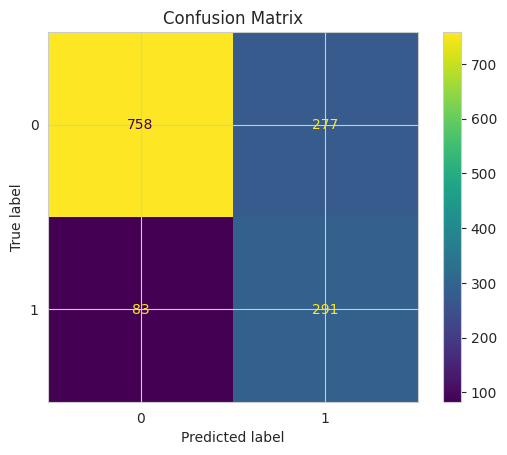

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.title("Confusion Matrix")
plt.show()


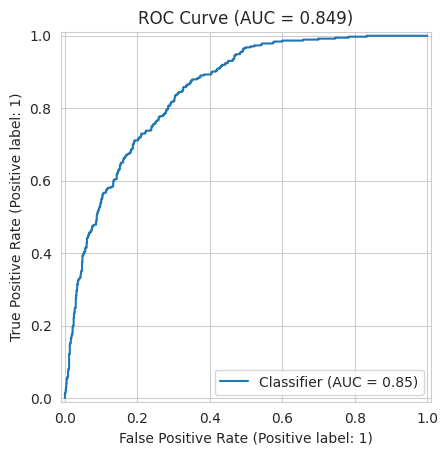

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_prob)

plt.title("ROC Curve (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob)))
plt.show()


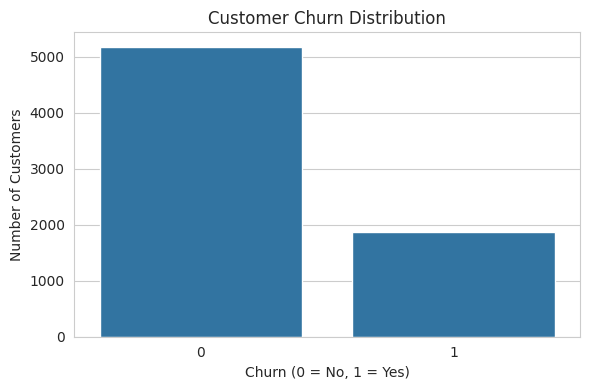

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.countplot(x="Churn Value", data=df)

plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()
